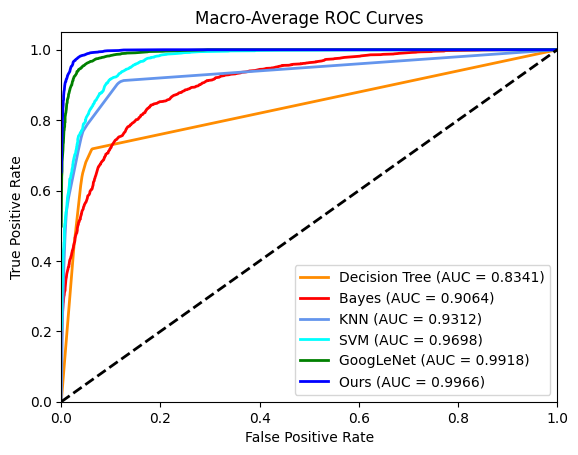

All macro ROC and PR curves plotted successfully.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 定义颜色和模型名称
colors = [ 'darkorange',  'red','cornflowerblue','aqua','green','blue']#,  'purple'
models = [ 'Decision Tree',  'Bayes',"KNN",'SVM','GoogLeNet','Ours']

# 绘制所有模型的宏ROC曲线
plt.figure()
for idx, model_name in enumerate(models):
    fpr = np.load(f'{model_name}/lbp/best_fpr.npy', allow_pickle=True).item()
    tpr = np.load(f'{model_name}/lbp/best_tpr.npy', allow_pickle=True).item()
    roc_auc = np.load(f'{model_name}/lbp/best_roc_auc.npy', allow_pickle=True).item()

    plt.plot(fpr["macro"], tpr["macro"], color=colors[idx % len(colors)], lw=2, label=f'{model_name} (AUC = {roc_auc["macro"]:0.4f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Macro-Average ROC Curves')
plt.legend(loc="lower right")
plt.savefig('lbp/macro_roc_curves.png', dpi=1000, bbox_inches='tight')
plt.show()
plt.close()

"""# 绘制所有模型的宏PR曲线
plt.figure()
for idx, model_name in enumerate(models):
    precision = np.load(f'{model_name}/GLCM/best_precision.npy', allow_pickle=True).item()
    recall = np.load(f'{model_name}/GLCM/best_recall.npy', allow_pickle=True).item()
    pr_auc = np.load(f'{model_name}/GLCM/best_pr_auc.npy', allow_pickle=True).item()

    plt.plot(recall["macro"], precision["macro"], color=colors[idx % len(colors)], lw=2, label=f'{model_name} (area = {pr_auc["macro"]:0.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Macro-Average Precision-Recall Curves')
plt.legend(loc="lower left")
plt.savefig('GLCM/macro_pr_curves.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()
"""
print("All macro ROC and PR curves plotted successfully.")


In [3]:
import numpy as np

# 加载数据
best_precision = np.load('GoogLeNet/lbp/best_precision.npy', allow_pickle=True).item()
best_recall = np.load('GoogLeNet/lbp/best_recall.npy', allow_pickle=True).item()
a = np.mean(best_precision['macro'])
b= np.mean([best_recall[i].mean() for i in range(len(best_recall) - 1)])

f1 = 2*a*b/(a+b)
print(a)
print(b)
print(f1)

0.9554846883608044
0.9210644799756619
0.9379589114522533
